# Exploring Trend in Names

In [1]:
# Importing libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#warning filter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv("names.csv", index_col = 'year')
df.head()

,name,sex,frequency
year,,,
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746


## Changing naming practices

A development related to the rate acceleration in name changes is name diver-
sification. It has been observed by various scholars that over the course of the
past two centuries more and more names came into use, while at the same time,
the most popular names were given to less and less children (Lieberson 2000).
In this section, we attempt to back up these two claims with some empirical
evidence.

The first claim can be addressed by investigating the type-token ratio of
names as it progresses through time. The annual type-token ratio is computed
by dividing the number of unique names occurring in a particular year (i.e., the
type frequency) by the sum of their frequencies (i.e., the token frequency). For
each year, our data set provides the frequency of occurrence of all unique names
occurring at least five times in that year. Computing the type-token ratio, then,
can be accomplished by dividing the number of rows by the sum of the names’
frequencies.

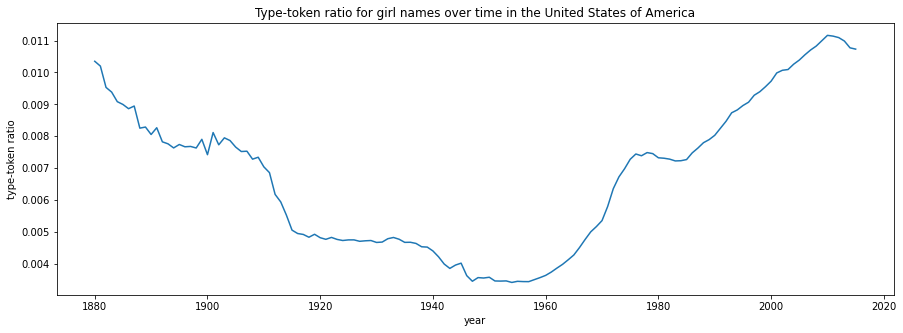

In [7]:
def type_token_ratio(frequencies):
    return len(frequencies)/frequencies.sum()

plt.figure(figsize = (15,5))
ax = df.loc[df['sex'] == 'F'].groupby(level = 0)['frequency'].apply(type_token_ratio).plot()
ax.set_ylabel("type-token ratio")
ax.set_title("Type-token ratio for girl names over time in the United States of America")

plt.show()

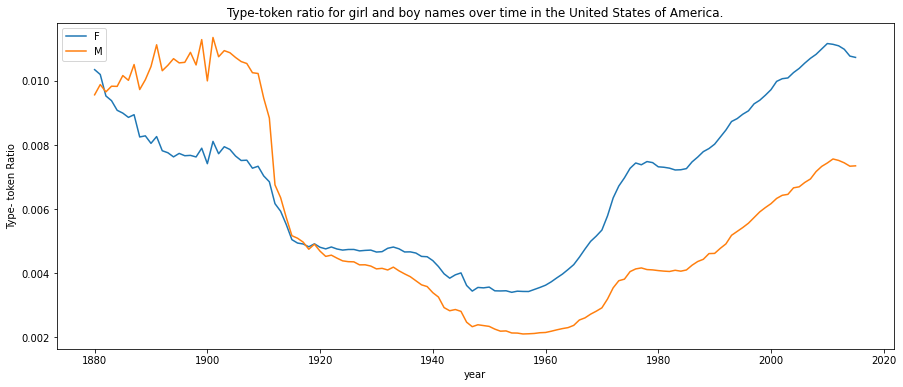

In [6]:
fig, ax = plt.subplots(figsize = (15,6))
for sex in ['F',"M"]:
    counts = df.loc[df['sex']==sex,'frequency']
    tt_ratios = counts.groupby(level = 0).apply(type_token_ratio)
    tt_ratios.plot(label = sex , legend = True , ax=ax)
ax.set_ylabel("Type- token Ratio")  
ax.set_title("Type-token ratio for girl and boy names over time in the United States of America.")
plt.show()

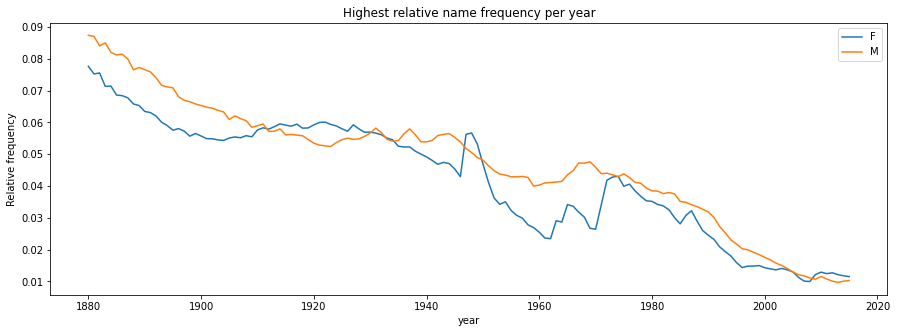

In [8]:
def max_relative_frequency(frequencies):
    return (frequencies/frequencies.sum()).max()

fig ,ax = plt.subplots(figsize = (15,5))

for sex in ["F","M"]:
    counts = df.loc[df['sex']==sex,'frequency']
    div = counts.groupby(level = 0).apply(max_relative_frequency)
    div.plot(label = sex, legend = True, ax = ax)
ax.set_ylabel("Relative frequency")
ax.set_title("Highest relative name frequency per year")
plt.show()

The results
show a clear decline in the usage frequency of the most popular names over time.

At first glance, the visualization above seems to run counter to the hypothesis of name diversification. After all, the type-ratio remains relatively high until
the early 1900s, and it is approximately equal to modern times. Were people
as creative name givers in the beginning of the twentieth century as they are
today? No, they were not. To understand the relatively high ratio in the beginning of the twentieth century, it should be taken into account that the dataset
misses many records from before 1935, when the Social Security Number system was introduced in the United States. Thus, the peaks in type-token ratio
at the beginning of the twentieth century essentially represent an artifact of the
data. After 1935, the data are more complete and more reliable. Starting in the
1960s, we can observe a steady increase of the type-token ratio, which is more
in line with the hypothesis of increasing diversity.

### A bias for names ending in n?

It has been noted at various occasions that one of the most striking changes in
the practice of name giving is the explosive rise in the popularity of boy names
ending with the letter n.

In [9]:
boys_names = df.loc[df['sex']=='M','name']
boys_endnames = boys_names.str.get(-1)
boys_endnames.head()

year
1880    n
1880    m
1880    s
1880    s
1880    e
Name: name, dtype: object

In [10]:
boys_fd = boys_endnames.groupby('year').value_counts(normalize = True)
boys_fd.head()

year  name
1880  n       0.181646
      e       0.156102
      s       0.098392
      y       0.095553
      d       0.080416
Name: name, dtype: float64

In [11]:
boys_fd = boys_fd.unstack().fillna(0)
boys_fd.head()

name,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,0.029328,0.006623,0.006623,0.080416,0.156102,0.006623,0.007569,0.032167,0.003784,0.0,...,0.0,0.068117,0.098392,0.060549,0.002838,0.000946,0.006623,0.003784,0.095553,0.002838
1881,0.027108,0.006024,0.008032,0.076305,0.148594,0.005020,0.012048,0.033133,0.003012,0.0,...,0.0,0.072289,0.098394,0.068273,0.002008,0.001004,0.006024,0.005020,0.095382,0.001004
1882,0.025501,0.006375,0.006375,0.080146,0.166667,0.007286,0.008197,0.033698,0.002732,0.0,...,0.0,0.067395,0.093807,0.062842,0.000911,0.000911,0.007286,0.004554,0.100182,0.002732
1883,0.028183,0.004859,0.006803,0.082604,0.158406,0.006803,0.008746,0.030126,0.001944,0.0,...,0.0,0.066084,0.099125,0.062196,0.001944,0.000972,0.008746,0.004859,0.094266,0.000972
1884,0.028444,0.008889,0.006222,0.080000,0.155556,0.005333,0.007111,0.031111,0.001778,0.0,...,0.0,0.073778,0.097778,0.061333,0.001778,0.000889,0.006222,0.003556,0.100444,0.002667


#### Boy name-final letter frequencies over time

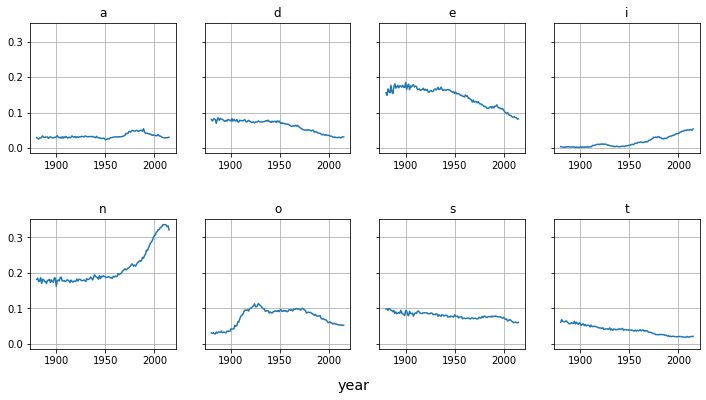

In [15]:
fig,axes = plt.subplots(nrows = 2, ncols = 4, sharey = True, figsize = (12,6))

letters = ['a','d','e','i','n','o','s','t']
axes = boys_fd[letters].plot(subplots = True, ax = axes , title = letters,color = 'C0',grid = True,legend = False)

for ax in axes.flatten():
    ax.xaxis.label.set_visible(False)
fig.text(0.5,0.04,'year',ha = 'center',va = 'center',fontsize = 'x-large')
fig.subplots_adjust(hspace = 0.5)

The
time series visualization of the usage frequency of the name-final letter n confirms the suggested explosive rise in the popularity of boys’ names ending with
the letter n. Over the years, the numbers gradually increase before they suddenly take off in the 1990s and 2000s. A second observation to be made is the
steady decrease of the name-final letter e as well as the letter d. Finally, we note
a relatively sudden disposition for the letter i in the late 1990s.

### Unisex names in the United States

The unisex degree
of a name can be defined in terms of its usage ratio between boys and girls.
A name with a 50-50 split appears to be more unisex than a name with a 5-
95 split. Furthermore, names that retain a 50-50 split over the years are more
ambiguous as to whether they refer to boys or girls than names with strong
fluctuations in their usage ratio.

In [40]:
def  usage_ratio(df):
    df = df.loc[df.duplicated(subset = 'name' , keep = False)]
    df = df.pivot_table(values = 'frequency' , index = 'name' , columns = 'sex')
    return df['F']/(df['F'] + df['M'])

d = df.groupby(level = 0).apply(usage_ratio)
d.head()

year  name 
1880  Addie    0.971631
      Allie    0.772059
      Alma     0.951890
      Alpha    0.812500
      Alva     0.195402
dtype: float64

In [41]:
d =d.unstack(level = 'name').fillna(0)
d.head(2)

name,Aaden,Aadi,Aadyn,Aalijah,Aaliyah,Aamari,Aamir,Aaren,Aarian,Aarin,...,Zuriel,Zyah,Zyair,Zyaire,Zyan,Zyian,Zyien,Zyion,Zyon,Zyree
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 10 most unisex names in the data

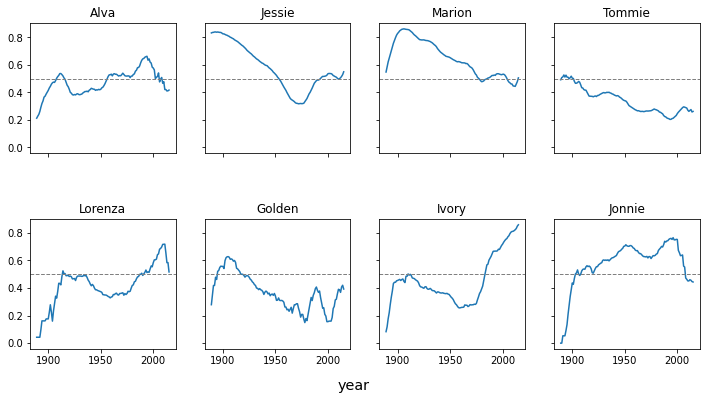

In [44]:
unisex_ranking = abs(d - 0.5).fillna(0.5).mean().sort_values().index
names = unisex_ranking[:8].tolist()
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True, figsize=(12, 6))
# Plot the time series into the subplots
d[names].rolling(window=10).mean().plot(
color='C0', subplots=True, ax=axes, legend=False, title=names)
# Clean up some redundant labels and adjust spacing
for ax in axes.flatten():
    ax.xaxis.label.set_visible(False)
    ax.axhline(0.5, ls='--', color="grey", lw=1)
fig.text(0.5, 0.04, "year", ha="center", va="center", fontsize="x-large")
fig.subplots_adjust(hspace=0.5)

The visualization showing the usage
ratio between boys and girls throughout the twentieth century. This visualization
employs a rolling average to smooth out some of the noise in the curves.